In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


interpretation:
    
    1)there are total 891 rows and 12 columns are present in the dataset.
    2)in which 2 float column, 5 interger column and5 objective column is there

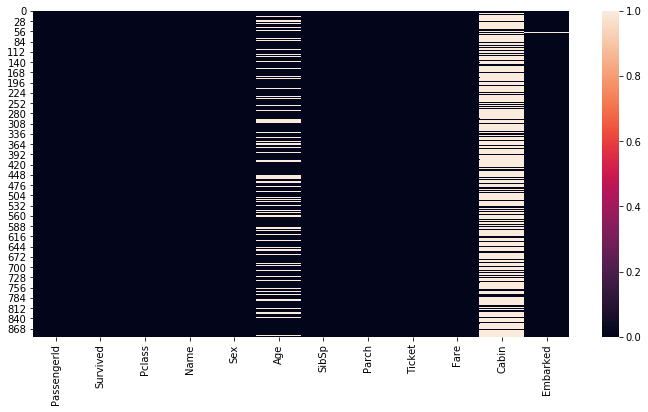

In [8]:
#to checki for null values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

null values are present in variable age, cabin, Embarked

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are total 177 null values in age, 687 null values in cabin, 2 null values in embarked

In [10]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [11]:
# Dropping cabin column because it has too many null values
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [13]:
# Imputing missing value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
# Imputing missing value for embarked
# finding the most appeard value in embarked columns
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [16]:
df['Embarked'].fillna('S',inplace=True)

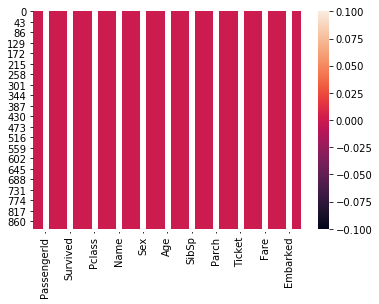

In [17]:
sns.heatmap(df.isnull(),annot=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#statistical summary()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


interpretation:
    
    1)high variation present in the passengerld
    2)most of variable having median zqro
    3)difference in third quartile and max value are high so outliers may presesnts.

In [20]:
dfcorr=df.corr()
dfcorr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


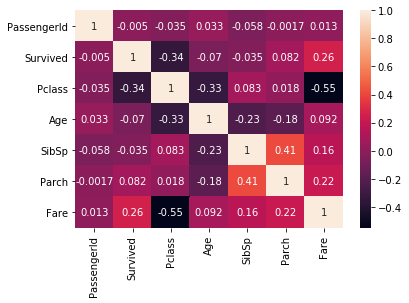

In [21]:
#lets check whether the null values are present in the dataset or not using heatmap
sns.heatmap(dfcorr,annot=True)

Light shades are highly correlated Survived is postivelt correlated with Parch and Fare Fare is highly negatively correlated with Pclass Pclass is negatively correlated with Survived

In [22]:
#EDA 
#Univaraiate Analysis

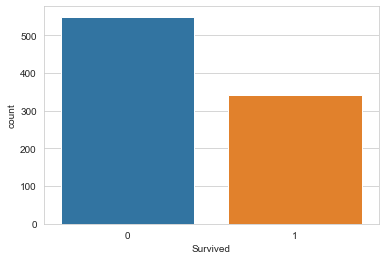

In [23]:
#survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

interpretation: as we can see that o are the most time repeated

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


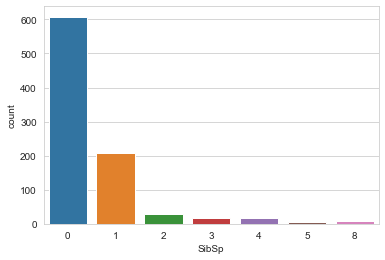

In [28]:
#sibsp
print(df['SibSp'].value_counts())
sns.countplot(df['SibSp'])

interpretation: ass 80% of the data are in favour of 0 and 1

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


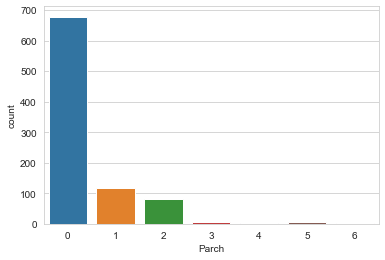

In [29]:
print(df['Parch'].value_counts())
sns.countplot(df['Parch'])

interpretation: as 90% of the data are in favour of 0 and 1

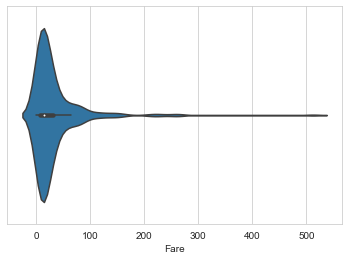

In [30]:
sns.violinplot(x='Fare',data=df)

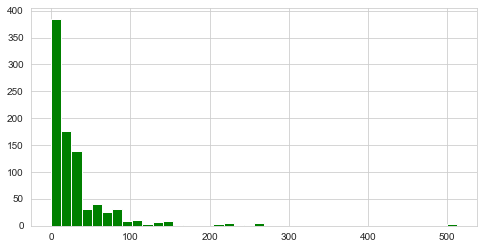

In [33]:
df['Fare'].hist(bins=40,color='green',figsize=(8,4))

almost all the fare is between 0 - 100

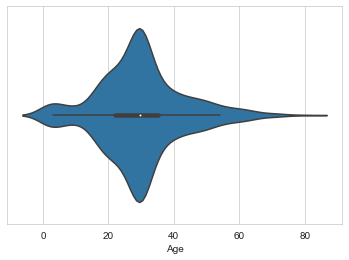

In [31]:
sns.violinplot(x='Age',data=df)

most of the passengers age is between 20 - 40

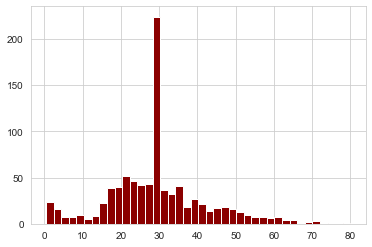

In [32]:
df['Age'].hist(bins=40,color='darkred')

passengers having age 30 is maximum

In [34]:
#bivariate analysis

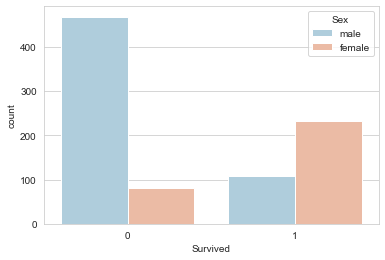

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

female survived more than male

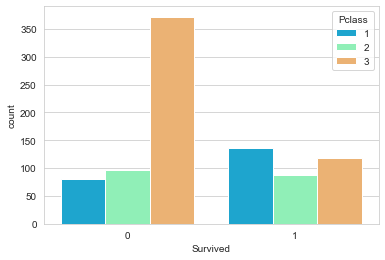

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

dead in class 3 is more

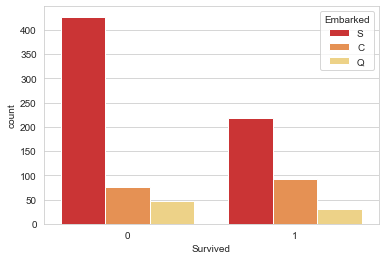

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=df,palette='YlOrRd_r')

In Embarked S more dead

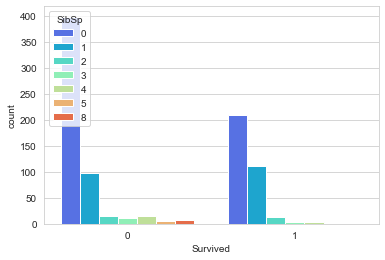

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=df,palette='rainbow')

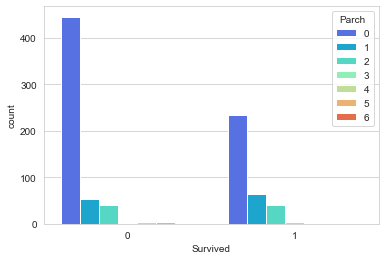

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=df,palette='rainbow')

parch having zero are more dead

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B4AF3A648>,
      dtype=object)

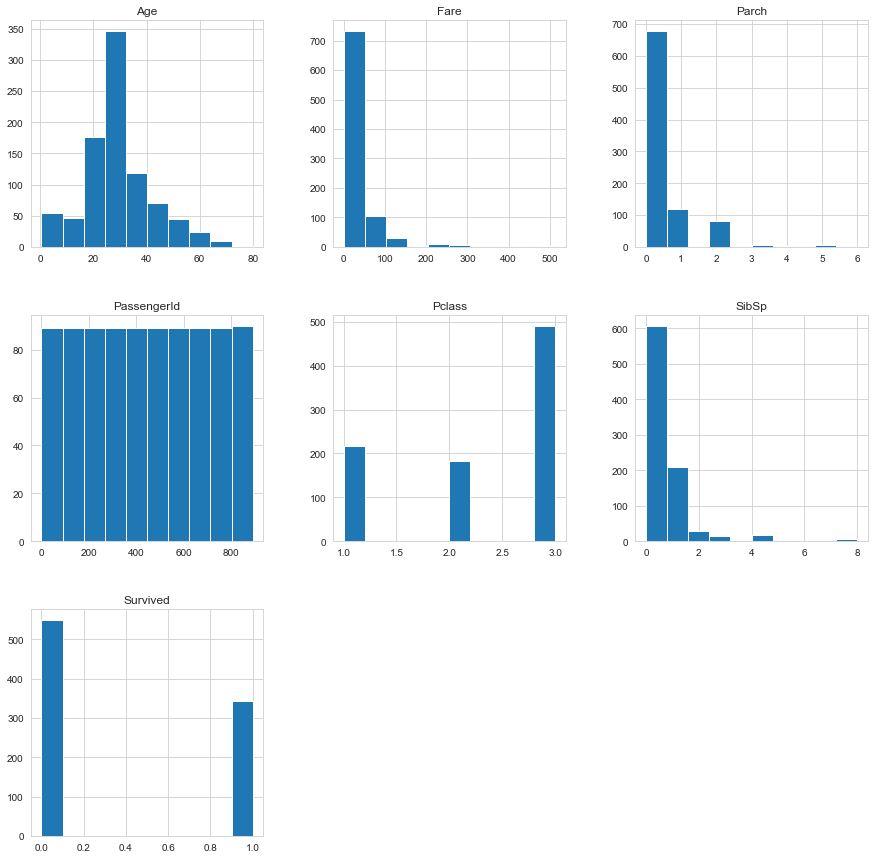

In [40]:
#multivariate data analysis
df.hist(figsize=(15,15))

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
#Droppng the columns which is not required

df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [43]:
df.shape

(891, 8)

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
# the data is in categories in some variables so we converted using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


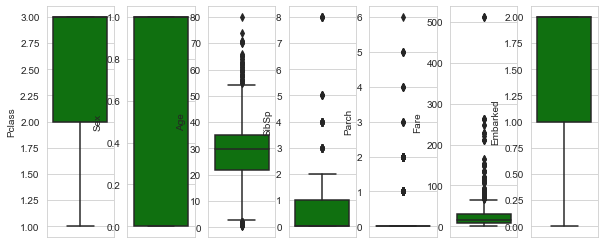

In [46]:
#checking for outliers
collist=df.columns.values
plt.figure(figsize=(20,50))
for i in range(1,len(collist)):
    plt.subplot(10,14,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout

outliers are present in some variables

In [47]:
#remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print(df.shape,df_new.shape)

(891, 8) (820, 8)


after removing outliers we lost 71 rows almost 8% of data

In [48]:
df=df_new

In [49]:
df.shape

(820, 8)

In [51]:
#cheking for skewness
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

skewness are present in the dataset

In [53]:
#x Y splitting

In [55]:
x=df.iloc[:,1:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [57]:
y=df.iloc[:,0:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)
print('xtrain shape--->',x_train.shape)
print('ytrain shape--->',y_train.shape)
print('xtest shape--->',x_test.shape)
print('ytest shape--->',y_test.shape)

xtrain shape---> (639, 7)
ytrain shape---> (639, 1)
xtest shape---> (181, 7)
ytest shape---> (181, 1)


In [60]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score              
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Using Grid Search to check the best parameters for SVM
from sklearn.model_selection import GridSearchCV

In [71]:
#grid search cv for logistic regression classifier
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 1000}

In [82]:
#logistic regression
lr=LogisticRegression(C=1000)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
score_lr=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr=scorelr.mean()

Accuracy Score: 0.8232044198895028
[[101  16]
 [ 16  48]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.75      0.75      0.75        64

    accuracy                           0.82       181
   macro avg       0.81      0.81      0.81       181
weighted avg       0.82      0.82      0.82       181

_________________________________________________
cross validation
Score of LogisticRegression(C=1000) is:
[0.79268293 0.7804878  0.7804878  0.80487805 0.79268293 0.76829268
 0.81707317 0.76829268 0.76829268 0.82926829]
Mean: 0.7902439024390244
Std: 0.020260058202239188


In [83]:
#gaussion NB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
score_gnb=accuracy_score(y_test,predgnb)
print("Accuracy Score:",accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))
print('_________________________________________________')
print('cross validation')
scoregnb=cross_val_score(gnb,x,y,cv=10)
print('Score of',gnb,'is:')
print(scoregnb)
print('Mean:',scoregnb.mean())
print('Std:',scoregnb.std())
cv_gnb=scoregnb.mean()

Accuracy Score: 0.8011049723756906
[[95 22]
 [14 50]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       117
           1       0.69      0.78      0.74        64

    accuracy                           0.80       181
   macro avg       0.78      0.80      0.79       181
weighted avg       0.81      0.80      0.80       181

_________________________________________________
cross validation
Score of GaussianNB() is:
[0.7195122  0.7195122  0.7804878  0.80487805 0.79268293 0.79268293
 0.82926829 0.75609756 0.75609756 0.7804878 ]
Mean: 0.7731707317073171
Std: 0.03370798770996405


In [74]:
#gridSearchCV for decision tree
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
clf=GridSearchCV(dt,parameters,scoring='accuracy',cv=5)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy'}

In [88]:
#Using DescisionTreeClassifier()
dtc=DecisionTreeClassifier(criterion=('entropy'))
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
score_dtc=accuracy_score(y_test,preddtc)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('_________________________________________________')
print('cross validation')
scoredtc=cross_val_score(dtc,x,y,cv=5)
print('Score of',dtc,'is:')
print(scoredtc)
print('Mean:',scoredtc.mean())
print('Std:',scoredtc.std())
cv_dtc=scoredtc.mean()

Accuracy Score: 0.8342541436464088
[[102  15]
 [ 15  49]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.77      0.77      0.77        64

    accuracy                           0.83       181
   macro avg       0.82      0.82      0.82       181
weighted avg       0.83      0.83      0.83       181

_________________________________________________
cross validation
Score of DecisionTreeClassifier(criterion='entropy') is:
[0.7195122  0.76219512 0.79878049 0.79268293 0.7804878 ]
Mean: 0.7707317073170732
Std: 0.02849590596475106


In [89]:
#gridSearchCV for knn
knc=KNeighborsClassifier()
parameters={'n_neighbors':[3,5,7,9]}
clf=GridSearchCV(knc,parameters,scoring='accuracy',cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 3}

In [90]:
#knn
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
predknc=knc.predict(x_test)
score_knn=accuracy_score(y_test,predknc)
print("Accuracy Score:",accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))
print('_________________________________________________')
print('cross validation')
scoreknc=cross_val_score(knc,x,y,cv=10)
print('Score of',knc,'is:')
print(scoreknc)
print('Mean:',scoreknc.mean())
print('Std:',scoreknc.std())
cv_knn=scoreknc.mean()

Accuracy Score: 0.7790055248618785
[[98 19]
 [21 43]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       117
           1       0.69      0.67      0.68        64

    accuracy                           0.78       181
   macro avg       0.76      0.75      0.76       181
weighted avg       0.78      0.78      0.78       181

_________________________________________________
cross validation
Score of KNeighborsClassifier(n_neighbors=3) is:
[0.67073171 0.63414634 0.7195122  0.7195122  0.79268293 0.69512195
 0.7804878  0.70731707 0.67073171 0.75609756]
Mean: 0.7146341463414634
Std: 0.047919226108264636


In [91]:
#Using Grid Search to check the best parameters for SVM
svc=SVC()
parameters={'kernel':('linear','poly','rbf'),'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [92]:
#Using SVC() from SVM

svc=SVC(kernel='linear',C=1)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
score_svc=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('_________________________________________________')
print('cross validation')
scoresvc=cross_val_score(svc,x,y,cv=15)
print('Score of',svc,'is:')
print(scoresvc)
print('Mean:',scoresvc.mean())
print('Std:',scoresvc.std())
cv_svc=scoresvc.mean()

0.8176795580110497
[[102  15]
 [ 18  46]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.75      0.72      0.74        64

    accuracy                           0.82       181
   macro avg       0.80      0.80      0.80       181
weighted avg       0.82      0.82      0.82       181

_________________________________________________
cross validation
Score of SVC(C=1, kernel='linear') is:
[0.8        0.8        0.81818182 0.78181818 0.72727273 0.89090909
 0.76363636 0.78181818 0.76363636 0.8        0.77777778 0.77777778
 0.75925926 0.81481481 0.81481481]
Mean: 0.7914478114478115
Std: 0.035757892799801766


In [94]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [107]:
#Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion='entropy', random_state=45,n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
score_rf=accuracy_score(y_test,predrf)
print('accuracy score:',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
print('_________________________________________________')
print('cross validation')
scorerf=cross_val_score(rf,x,y,cv=10)
print('Score of',rf,'is:')
print(scorerf)
print('Mean:',scorerf.mean())
print('Std:',scorerf.std())
cv_rf=scorerf.mean()

accuracy score: 0.861878453038674
[[106  11]
 [ 14  50]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       117
           1       0.82      0.78      0.80        64

    accuracy                           0.86       181
   macro avg       0.85      0.84      0.85       181
weighted avg       0.86      0.86      0.86       181

_________________________________________________
cross validation
Score of RandomForestClassifier(criterion='entropy', random_state=45) is:
[0.70731707 0.75609756 0.7804878  0.81707317 0.87804878 0.81707317
 0.81707317 0.73170732 0.85365854 0.84146341]
Mean: 0.8
Std: 0.0520833085464942


we see that random forest has highest accuracy score so we choose random forest classifier

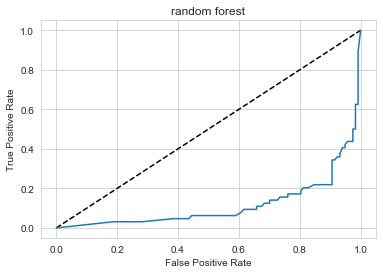

0.8066239316239316


In [111]:
#AUC_ROC Curve of random forest
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf.predict_proba(x_test)[:,:1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('random forest')
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

In [112]:
#Saving the model
import joblib

#Save the model as a pickle in a file
joblib.dump(rf,'titanic.pkl')

['titanic.pkl']